# NLM Assignment 5
### Natalie Kim

In [19]:
# Libraries/Packages
import pandas as pd
import numpy as np
import lifelines
from lifelines.datasets import load_dd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [3]:
# Read Cancer CSV
data = pd.read_csv(r'/Users/xnxk040/Library/CloudStorage/OneDrive-W.WGrainger,inc/Desktop/linear-nonlinear data/cancer.csv')

#### Cancer data
- Survival in patients with advances lung cancer from the North Central Cancer Treatment Group.
- Performance scores rate how well the patient can perform usual daily activities

##### Columns
- `inst`: institution code
- `time`: survival time in days
- `status`: censoring status; 1 = censored; 2 = dead
- `age`: age in years
- `sex`: male = 1; female = 2
- `ph.ecog`: ecog performance score; 0 = good; 5 = dead
- `ph.karno`: karnofsky performance score (0 = bad; 100 = good)
- `pat.karno`: karnofsky performance score (0 = bad; 100 = good)
- `meal.cal`: calories consumed at meals
- `wt.loss`: weight loss in last six months

In [4]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


##### Add new column `dead` that stores data about whether a person that is part of our experiment is dead or alive (based on status value)
Alive (1) = 1 (status) ; Dead (0) = 2 (status)

In [16]:
data['dead'] = data['status'].apply(lambda x: 1 if x == 1 else 0)

In [17]:
data.head(1)

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,0


In [8]:
# Count censored data
cens_count = len(data[data['status'] == 1])
print(cens_count)

63


### Part A
Fit Kaplan-Meier method on time and dead columns and plot survival function

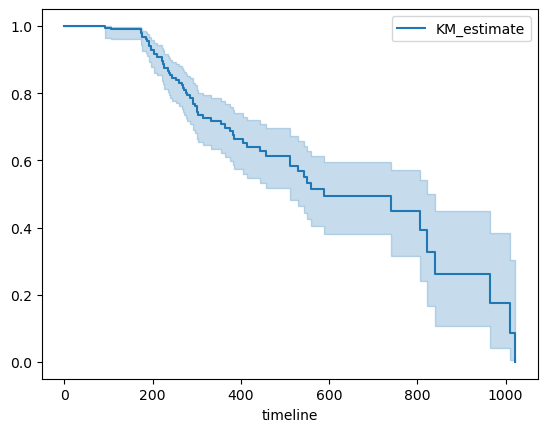

In [21]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(data['time'], data['dead'])
kmf.plot_survival_function()
plt.show()

### Part B
Print median survival time

In [22]:
print(kmf.median_survival_time_)

588.0


### Part C
Print Kaplan-Meier estimates (timeline vs k-m estimate)

In [24]:
pd.set_option('display.max_rows', None)
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
5.0          1.000000
11.0         1.000000
12.0         1.000000
13.0         1.000000
15.0         1.000000
26.0         1.000000
30.0         1.000000
31.0         1.000000
53.0         1.000000
54.0         1.000000
59.0         1.000000
60.0         1.000000
61.0         1.000000
62.0         1.000000
65.0         1.000000
71.0         1.000000
79.0         1.000000
81.0         1.000000
88.0         1.000000
92.0         0.995025
93.0         0.995025
95.0         0.995025
105.0        0.989948
107.0        0.989948
110.0        0.989948
116.0        0.989948
118.0        0.989948
122.0        0.989948
131.0        0.989948
132.0        0.989948
135.0        0.989948
142.0        0.989948
144.0        0.989948
145.0        0.989948
147.0        0.989948
153.0        0.989948
156.0        0.989948
163.0        0.989948
166.0        0.989948
167.0        0.989948
170.0        0.989948
173.0        0.984091
174.0     

### Part D
Create combined plot where male and female groups' Kaplan-Meier survival functions displayed

In [27]:
# subset data for males
male_subset = data[data['sex'] == 1]

# subset data for females
female_subset = data[data['sex'] == 2]

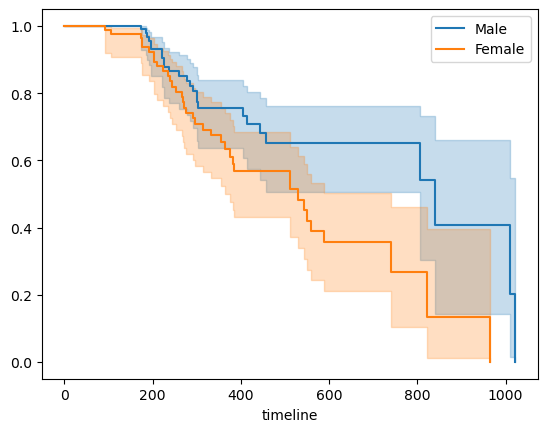

In [29]:
# kmf for males
kmf_m = lifelines.KaplanMeierFitter()
kmf_m.fit(male_subset['time'], male_subset['dead'], label = 'Male')

# kmf for females
kmf_f = lifelines.KaplanMeierFitter()
kmf_f.fit(female_subset['time'], female_subset['dead'], label = 'Female')

# plot
ax = plt.subplot(111)

kmf_m.plot_survival_function(ax=ax)
kmf_f.plot_survival_function(ax=ax)

plt.show()

### Part E
Conduct log-rank test and test null hypothesis that there is no difference in survival between 2 groups, namely male vs female

In [30]:
from lifelines.statistics import logrank_test

In [32]:
# log-rank test
results = logrank_test(durations_A = male_subset['time'],
                       durations_B = female_subset['time'],
                       event_observed_A = male_subset['dead'],
                       event_observed_B = female_subset['dead'])

In [33]:
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.23 0.01      6.31

The p-value is 0.01, which is less than standard threshold of 0.05. Since it's smaller, we reject the null hypothesis and conclude that there is a difference in survival between male and female groups.